# DATA VISUALITATION

Let's start with the assumption that we don't know much about anime and we apologize for any false observations we might make.

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import numpy as np

In [19]:
# I don't know if we have to read all dataset also in this file or we can import from the data cleaning file
# da passare dataset già puliti
anime_details_df = pd.read_csv('datasets/PHIL DATA SET/details.csv')

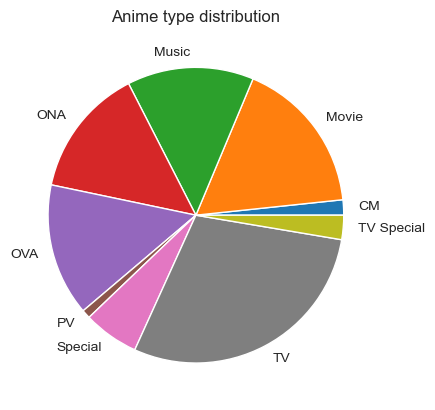

In [20]:
# In the first moment we see the type of anime to analyse how are distributed, to do this we use the easier graph that we know, pie chart
details_type = anime_details_df.groupby("type").size()
details_type.plot(kind='pie')
plt.title('Anime type distribution')
plt.show()


Just an example of graph to see how they look, other example that we can develop are:

### For the first dataset we can have:
     - questo sopra è il grafico di dove è uscito l'anime (tv, cinema, internet...), possiamo analizzare se c'è qualche correlazione con il tema/genere   dell'anime (non ho capito differenza tra tema/genere).
     - vedere come si sono svillupati negli anni, quindi fare un grafico con "start-date" e "type" per vedere come internet ha infuenzato gli la visione  degli anime.
     - non ho ben capito cosa sia end-date (che non sono piu presenti su internet questi anime??)

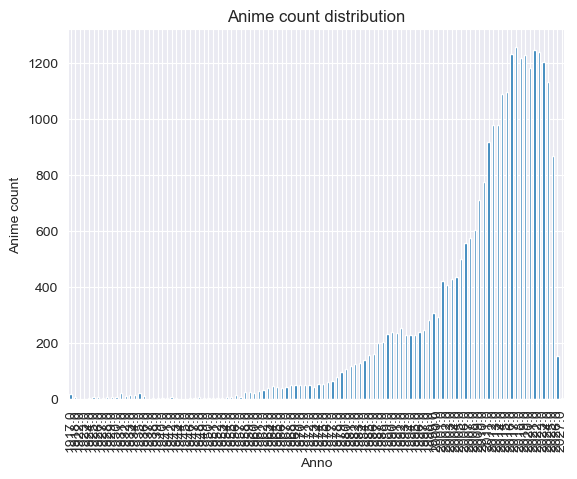

In [21]:
# da togliere quando passiamo dataset gia puliti
anime_details_df["start_date"] = pd.to_datetime(anime_details_df["start_date"], errors='coerce')

anime_counts = anime_details_df["start_date"].dt.year.value_counts().sort_index()

anime_counts.plot(kind='bar')
plt.title('Anime count distribution')
plt.xlabel("Anno")
plt.ylabel("Anime count")
 
plt.show()

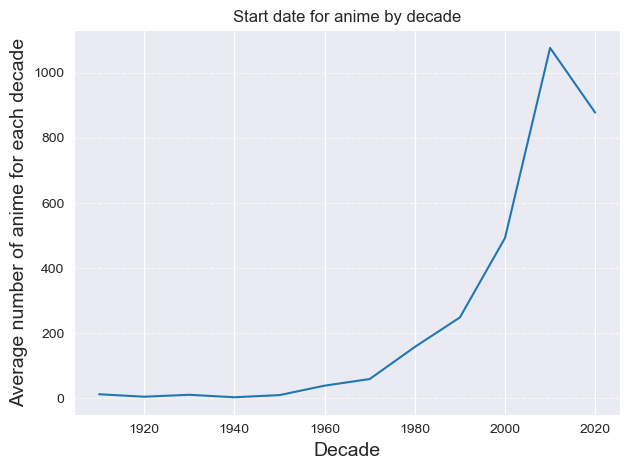

In [22]:
# to represent decade
anime_details_df["decade"] = ((anime_details_df["start_date"].dt.year // 10) * 10).astype("Int64")
film_counts_by_decade = anime_details_df["decade"].value_counts().sort_index()


# take only the years that are present to compose the decade
years_per_decade = (anime_details_df["start_date"].dt.year.groupby(anime_details_df["decade"]).nunique())

adjusted_counts = film_counts_by_decade / years_per_decade

# Plot di film_counts_by_decade
plt.plot(adjusted_counts.index, adjusted_counts.values)

plt.title("Start date for anime by decade")
plt.xlabel("Decade", fontsize=14)
plt.ylabel("Average number of anime for each decade", fontsize=14)
plt.grid(True, axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

Vediamo il boom che c'è agli inizi del 2000 e per spiegare questo picco possiamo generare un grafico che ci faccia vedere i valori degli anime usciti negli anni tramite il tipo

In [23]:
anime_details_df.dtypes

mal_id                           int64
title                           object
title_japanese                  object
url                             object
image_url                       object
type                            object
status                          object
score                          float64
scored_by                      float64
start_date         datetime64[ns, UTC]
end_date                        object
synopsis                        object
rank                           float64
popularity                       int64
members                          int64
favorites                        int64
genres                          object
studios                         object
themes                          object
demographics                    object
source                          object
rating                          object
episodes                       float64
season                          object
year                           float64
producers                

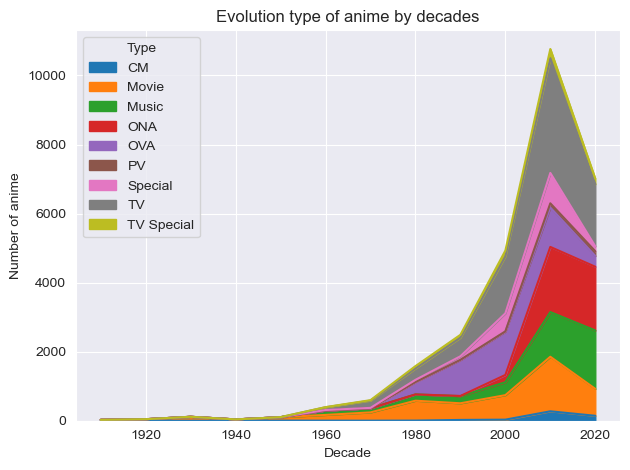

In [24]:
type_by_decade = anime_details_df.pivot_table(
    index="decade",       # rows = decadi
    columns="type",      # columns = type
    values="title",      
    aggfunc="count",
    fill_value=0
)

type_by_decade.plot(kind="area")

plt.title("Evolution type of anime by decades")
plt.xlabel("Decade")
plt.ylabel("Number of anime")
plt.legend(title="Type")
plt.tight_layout()
plt.show()

Il grafico mostra chiaramente che il picco di anime negli anni duemila è dovuto principalmente alla televisione, che in quel periodo registrò un aumento significativo di reti e canali. Questo incremento riguardò sia le serie regolari sia i “TV Special”, cioè episodi singoli non appartenenti a serie continuative. Nel decennio 2000–2010, il numero di anime prodotti raggiunse livelli mai osservati prima e, successivamente, non venne più superato

In [25]:
anime_details_df["start_date"].dt.year.value_counts().sort_index()

start_date
1917.0      17
1918.0       9
1922.0       1
1923.0       1
1924.0       5
          ... 
2023.0    1203
2024.0    1131
2025.0     867
2026.0     154
2027.0       3
Name: count, Length: 108, dtype: int64

GENRES ANALYSIS

In [26]:
# check type of genres rows to do explode 
type(anime_details_df["genres"].iloc[0])

str

In [27]:
# to list from string
anime_details_df["genres"] = anime_details_df["genres"].apply(ast.literal_eval)

df_vis = anime_details_df.explode('genres')
genres_counts = df_vis["genres"].value_counts().sort_index()

In primis vediamo come sono divisi i ventuno generi che sono presenti per capire a livello visivo i top generi di anime prodotti come punti successivi vedremo una visualizzazione dei generi come si sono svillupati negli anni e provare a capire se avvenimenti storici possano aver influenzato la crescita 

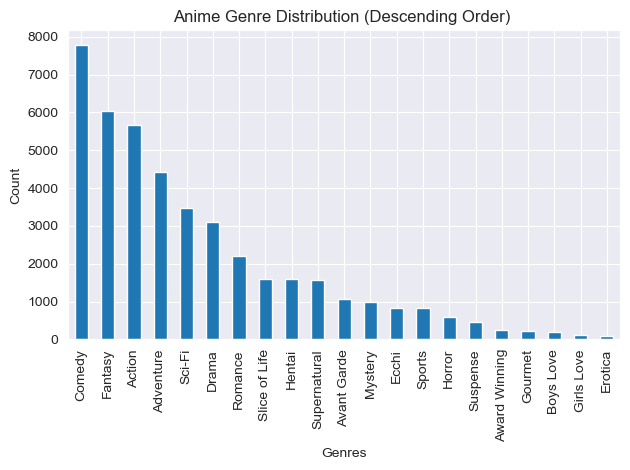

In [28]:
genres_counts.sort_values(ascending=False).plot(kind="bar")

plt.xlabel("Genres")
plt.ylabel("Count")
plt.title("Anime Genre Distribution (Descending Order) ")
plt.tight_layout()
plt.show()

Dopo aver visualizzato in modo decrescente i generi più presenti il prossimo grafico analizzerà tre variabili assieme che saranno il tipo di genere, il tempo (in decadi) e la quantità di questo genere (inteso come quanti anime con questo genere sono presenti).

In [29]:
anime_details_df.columns

Index(['mal_id', 'title', 'title_japanese', 'url', 'image_url', 'type',
       'status', 'score', 'scored_by', 'start_date', 'end_date', 'synopsis',
       'rank', 'popularity', 'members', 'favorites', 'genres', 'studios',
       'themes', 'demographics', 'source', 'rating', 'episodes', 'season',
       'year', 'producers', 'explicit_genres', 'licensors', 'streaming',
       'decade'],
      dtype='object')

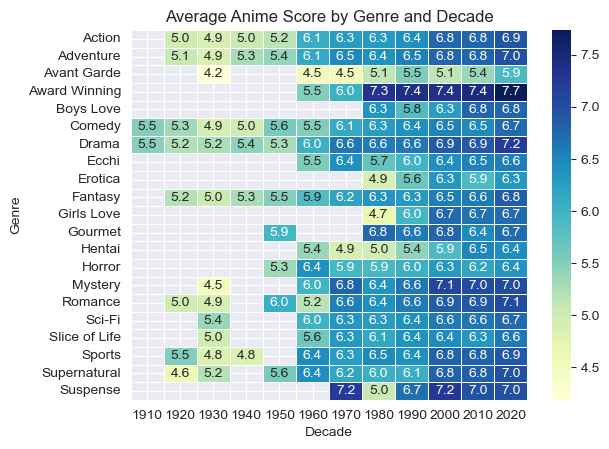

In [30]:
# Pivot table: Index=Genres, Columns=Decade, Values=Mean Score
heatmap_data = df_vis.pivot_table(index='genres', columns='decade', values='score', aggfunc='mean')

sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title("Average Anime Score by Genre and Decade")
plt.xlabel("Decade")
plt.ylabel("Genre")
plt.show()

Da questo grafico vediamo che in ogni genere che prendiamo, dei 21 generi presenti, piu andiamo avanti nel tempo più lo score quindi il voto del pubblico è piu alto, vediamo di trovare delle correlazioni nelle prossime visualizzazioni. Nel prossimo grafico vogliamo vedere in base all'età i generi più visti oppure sempre in base all'età possiamo vedere il voto medio dato. Altra idea carina è vedere com'è cambiato il pubblico se prima gli anime era una cosa piu per bambini/ragazzi mentre adesso si è diffusa anche negli adulti.

### For the second dataset we can have:
    - il secondo dataset contiene solo 4 valori possibili possiamo visualizzare i valori tramite un grafico di quantità (non ho capito cosa siano anime, character, people, company) 
    - trovare correlazione dopo aver capito cosa sono
   

### For the third dataset we can have:
    - potremmo fare un grafico per visualizzare i primi 10 "person" che hanno più nomi alternativi (saltabile, molto inutile)
    - dataset molto inutile

Controllare la correlazione tra numero di nomi alternativi e genere, con genere normalizzato (se il dataset contiene il 90% di uomini, allora se le prime due sono donne hanno molta più importanza)
    

In [31]:
### For the fourth dataset we can have:
    - controllare la correlazione tra attore singolo e cambio di genere negli anni
    - vedere la distribuzione degli anni in cui ogni attore ha lavorato di pù (e.g. attori che hanno lavorato di pù negli anni 2000 vs attori che hanno lavorato di pù negli anni 2010)
GRAFICO INTERATTIVO per cui per ogni anno abbiamo un istogramma con il numero di anime prodotti in quell'anno per ogni attore

Range di attori che hanno tra i 50 e i 70 anni e fare un grafico in cui vediamo come hanno cambiato genere negli anni (bin di 10 anni)



IndentationError: unexpected indent (426554211.py, line 2)